# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [2]:
human_files[170]

'/data/lfw/Frank_Zappa/Frank_Zappa_0001.jpg'

<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1
x: 66
y: 68
w: 110
h: 110


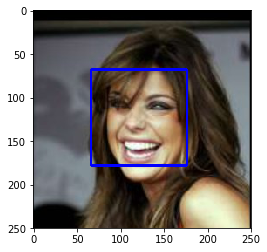

In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[3333])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    print('x:', x)
    print('y:', y)
    print('w:', w)
    print('h:', h)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [4]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [5]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.


In [6]:
# MSJ #
detected_face_human_files_true = 0
human_files_short_count = len(human_files_short)

for img in human_files_short:
    if face_detector(img) == True:
        detected_face_human_files_true += 1

percentage_human_files_face = 100 * float(detected_face_human_files_true)/float(human_files_short_count)

print("Percentage of the first 100 images in human_files that have a detected human face: {}%".format(percentage_human_files_face))

Percentage of the first 100 images in human_files that have a detected human face: 98.0%


In [7]:
# MSJ #
detected_face_dog_files_true = 0
dog_files_short_count = len(dog_files_short)

for img in dog_files_short:
    if face_detector(img) == True:
        detected_face_dog_files_true += 1

percentage_dog_files_face = 100 * float(detected_face_dog_files_true)/float(dog_files_short_count)

print("Percentage of the first 100 images in dog_files that have a detected human face: {}%".format(percentage_dog_files_face))

Percentage of the first 100 images in dog_files that have a detected human face: 17.0%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [8]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [9]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [01:33<00:00, 5901035.65it/s] 


In [10]:
use_cuda

True

In [11]:
VGG16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [12]:
from PIL import Image
import torchvision.transforms as transforms

In [13]:
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    # MSJ #
    # Open image 
    img_path = Image.open(img_path)

    # Transform data
    transform_img = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

    img_file = transform_img(img_path)
    img_file = img_file.unsqueeze(0)
    img_file = img_file.float()
    
    # For GPU
    if use_cuda:
        img_file = img_file.cuda()

    # Perform prediction
    output = VGG16(img_file)

    # Convert output probabilities to predicted class (from Transfer Learning lesson)
    # Prediction will be the index of the class label with the largest value
    pred = torch.max(output, 1) 

    # The second return value is the index location of each maximum value found   
    return pred[1].item() # predicted class index

In [14]:
VGG16_predict(dog_files_short[21])

243

In [15]:
VGG16_predict(dog_files_short[65])

236

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [16]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    # MSJ #
    dog_detected = False;
    
    if VGG16_predict(img_path) in range(151, 268):
        dog_detected = True;
        
    return dog_detected # true/false

In [17]:
dog_detector(dog_files_short[21])

True

In [18]:
dog_detector(dog_files_short[65])

True

In [19]:
dog_detector(human_files_short[7])

False

In [20]:
dog_detector(human_files_short[99])

False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ (See printout)


In [21]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

# MSJ #
detected_dog_human_files_true = 0

for img in human_files_short:
    if dog_detector(img) == True:
        detected_dog_human_files_true += 1

percentage_human_files_dog = 100 * float(detected_dog_human_files_true)/float(human_files_short_count)

print("Percentage of images in human_files_short that have a detected dog: ", percentage_human_files_dog)


Percentage of images in human_files_short that have a detected dog:  0.0


In [23]:
# MSJ #
detected_dog_dog_files_true = 0

for img in dog_files_short:
    if dog_detector(img) == True:
        detected_dog_dog_files_true += 1

percentage_dog_files_dog = 100 * float(detected_dog_dog_files_true)/float(human_files_short_count)

print("Percentage of images in dog_files_shortt that have a detected dog: ", percentage_dog_files_dog)


Percentage of images in dog_files_shortt that have a detected dog:  100.0


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [24]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [25]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

In [26]:
# MSJ
# Setting directories
data_dir = '/data/dog_images'
train_dir = data_dir + '/train'
test_dir = data_dir + '/test'
valid_dir = data_dir + '/valid'

In [27]:
# Define transforms
# https://discuss.pytorch.org/t/questions-about-imagefolder/774/6

train_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

valid_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

In [28]:
# Load the datasets with ImageFolder
image_datasets = {}
image_datasets["train"] = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
image_datasets["test"] = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)
image_datasets["valid"] = datasets.ImageFolder(data_dir + '/valid', transform=valid_transforms)

In [29]:
# Sample value
image_datasets["train"][5]

(tensor([[[-2.1179, -2.1179, -2.1179,  ..., -1.2103, -1.2617, -1.2959],
          [-2.1179, -2.1179, -2.1179,  ..., -1.1932, -1.2274, -1.2617],
          [-2.1179, -2.1179, -2.1179,  ..., -1.0562, -1.0562, -1.0219],
          ...,
          [-0.0116,  0.0056,  0.0056,  ..., -2.1179, -2.1179, -2.1179],
          [-0.0287,  0.0056,  0.0056,  ..., -2.1179, -2.1179, -2.1179],
          [-0.0287, -0.0116, -0.0116,  ..., -2.1179, -2.1179, -2.1179]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -1.1429, -1.1954, -1.2304],
          [-2.0357, -2.0357, -2.0357,  ..., -1.1253, -1.1604, -1.1954],
          [-2.0357, -2.0357, -2.0357,  ..., -1.0203, -1.0203, -0.9853],
          ...,
          [ 0.1527,  0.1702,  0.1702,  ..., -2.0357, -2.0357, -2.0357],
          [ 0.1352,  0.1702,  0.1702,  ..., -2.0357, -2.0357, -2.0357],
          [ 0.1352,  0.1527,  0.1527,  ..., -2.0357, -2.0357, -2.0357]],
 
         [[-1.8044, -1.8044, -1.8044,  ..., -0.8981, -0.9504, -0.9853],
          [-1.8044, -1.8044,

In [30]:
# Check type
type(image_datasets["train"][5])

tuple

In [31]:
# Check shape
image_datasets["train"][5][0].shape

torch.Size([3, 224, 224])

In [32]:
# Check len
len(image_datasets["train"])
len(image_datasets["test"])
len(image_datasets["valid"])

835

In [33]:
# Using the image datasets and the trainforms, define the dataloaders
loaders = {}
loaders["train"] = torch.utils.data.DataLoader(image_datasets["train"], batch_size=32, shuffle=True)
trainloader = loaders["train"]

loaders["test"] = torch.utils.data.DataLoader(image_datasets["test"], batch_size=32)
testloader = loaders["test"]

loaders["valid"] = torch.utils.data.DataLoader(image_datasets["valid"], batch_size=32)
validloader = loaders["valid"]

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
* Using the torchvision transforms library, the code chains image transformations and augmentations together using `compose`. 
* For image transformations / augmentations, the following were applied:
 * Train dataset: Resizing, random rotation, random resized crop and random horizontal flip
 * Test dataset: Resizing, center crop
 * Validation dataset: Resizing, center crop
* For the input tensor, I just wanted to make sure that the image was 224 x 224 as this is what is expected for ImageNet images.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [34]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # MSJ
        '''
            Input is 224 x 224 x 3 (RGB image)
            
            From mentor: (https://knowledge.udacity.com/questions/390279)
            The issue is that you've used padding=0 in conv2 and conv3 layers.
            Padding decides the size of the filter output. Therefore the output 
            of conv2 and conv3 is not 56x56 and 28x28.
            
        '''
        # Conv layers
        self.conv1 = nn.Conv2d(3, 64, 5, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, 128, 2, stride=1, padding=1)
        self.conv3 = nn.Conv2d(128, 256, 2, stride=1, padding=1)
        
        # Max pooling
        self.pool = nn.MaxPool2d(2, 2)
        
        # FC layers for classification
        self.fc1 = nn.Linear(28 * 28 * 256, 256)
        self.fc2 = nn.Linear(256, 133) # Output is 133
        # Dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)
        
    
    def forward(self, x):
        ## Define forward behavior
        # MSJ
        
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # flatten image input
        x = x.view(-1, 28 * 28 * 256)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

1) Did some research on 'rule of thumbs' and guidance for CNN architectures. Found a link which provided some ideas: https://www.reddit.com/r/MachineLearning/comments/3l5qu7/rules_of_thumb_for_cnn_architectures/

2) I wanted to keep things simple since I'm new to this and also figured that I wanted to use a max of 3 convolutional layers so that the model won't take too long to run. Because of this, I picked a random number that wasn't too large and wasn't too small for the depth of the first output, bearing in mind that I wanted to double this for the succeeding outputs, to a point where it's not too far from the width / height of the input.
- Input: 224 x 224
- Selected starting output depth: 64 (64 seems to be a common number in the computing world so thought it'd be good)
- Depth of next layers: 64 -> 128 -> 256 (256 is not too far from 224)

3) For conv1, I thought of making kernel_size=5 and because of this, added padding=1 because 5 is an odd number compared to 224 which is an even number. 

4) For conv2 and conv3, I decided to double the depths until the number was not too far from 224 (input)

5) After adding the FC layers, activation and dropout layers, I proceeded to start training my model.

6) I was getting errors and learned that for conv2 and conv3, I had to make padding=1 because I did it for the first layer. After things, the model trained successfully.

7) For the FC layers, I computed what the outputs would be from each Conv2d layer. This is how I determined the first input of the first FC layer. For the output, I decided to use the output depth of the last Conv2d layer. I thought that this was ok because it was a value that also was not that much higher than the output of the last FC layer.

8) I decided to add dropout and relu functions, following what was done in the exercises

Overall, it was quite random what I did, but I did this because I was curious how the CNN would perform.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [35]:
import torch.optim as optim

### TODO: select loss function
# MSJ: Selecting Cross Entropy Loss
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
# MSJ: Selected SGD
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [36]:
# Found on https://knowledge.udacity.com/questions/32899
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        
        for batch_idx, (data, target) in enumerate(loaders['train']):
            
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))

            # MSJ -> See cifar10_cnn_solution.ipynb
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            # MSJ
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

        # calculate average losses
        train_loss = train_loss/len(trainloader)
        valid_loss = valid_loss/len(validloader)
            
        # print training/validation statistics 
        print('Epoch #{} | Training Loss: {:.6f} | Validation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        # MSJ: -> See cifar10_cnn_solution.ipynb 
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            
            print('Saving model as validation loss has decreased from {:.6f} to {:.6f}.'.format(
            valid_loss_min,
            valid_loss))
            
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# train the model
# lowering epochs to test code changes
model_scratch = train(50, loaders, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch #1 | Training Loss: 0.023389 | Validation Loss: 0.180776
Saving model as validation loss has decreased from inf to 0.180776.
Epoch #2 | Training Loss: 0.023317 | Validation Loss: 0.180276
Saving model as validation loss has decreased from 0.180776 to 0.180276.
Epoch #3 | Training Loss: 0.023192 | Validation Loss: 0.178275
Saving model as validation loss has decreased from 0.180276 to 0.178275.
Epoch #4 | Training Loss: 0.022892 | Validation Loss: 0.173494
Saving model as validation loss has decreased from 0.178275 to 0.173494.
Epoch #5 | Training Loss: 0.022520 | Validation Loss: 0.169530
Saving model as validation loss has decreased from 0.173494 to 0.169530.
Epoch #6 | Training Loss: 0.022243 | Validation Loss: 0.167765
Saving model as validation loss has decreased from 0.169530 to 0.167765.
Epoch #7 | Training Loss: 0.022070 | Validation Loss: 0.166618
Saving model as validation loss has decreased from 0.167765 to 0.166618.
Epoch #8 | Training Loss: 0.021958 | Validation Loss:

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [37]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n\n'.format(test_loss))

    print('Test Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.870439


Test Accuracy: 12% (102/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [38]:
## TODO: Specify data loaders
# MSJ: Use loaders above so changed "loaders_transfer" in code below to "loaders"

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [39]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
use_cuda = torch.cuda.is_available()

In [40]:
# MSJ - Following Transfer_Learning_Solution.ipynb

# Load the pretrained model from pytorch
model_transfer = models.vgg16(pretrained=True)

# Print model structure
print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [41]:
print(model_transfer.classifier[6].in_features) 
print(model_transfer.classifier[6].out_features) 

4096
1000


In [42]:
# Freeze training for all "features" layers
for param in model_transfer.features.parameters():
    param.requires_grad = False

In [43]:
n_inputs = model_transfer.classifier[6].in_features

# new layers automatically have requires_grad = True
# replace output of last layer as per aboe
last_layer = nn.Linear(n_inputs, 133)

model_transfer.classifier[6] = last_layer

# Print model structure
print(model_transfer)

if use_cuda:
    model_transfer = model_transfer.cuda()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

1) Some time ago, I took an Intro to AI prograamming course with Udacity where I was first introduced to VGG16. Because of this, I decided to try it again (and to also get a refresher on it) 

2) I used the exercises as a reference to create the final CNN architecture

3) As VGG16 is considered to be an excellent vision model architecture, I thought it was a good architecture to use and after seeing the results of the model, I still think it was a good choice. VGG16 was already previously trained on many images so has tested and proven hyperparameters that work for image recognition use cases.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [44]:
# MSJ
# Trying CrossEntropyLoss() and SGD Optimizer
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [45]:
# train the model
# MSJ
n_epochs=30

model_transfer = train(n_epochs, loaders, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch #1 | Training Loss: 0.022355 | Validation Loss: 0.145623
Saving model as validation loss has decreased from inf to 0.145623.
Epoch #2 | Training Loss: 0.018676 | Validation Loss: 0.103299
Saving model as validation loss has decreased from 0.145623 to 0.103299.
Epoch #3 | Training Loss: 0.014619 | Validation Loss: 0.064577
Saving model as validation loss has decreased from 0.103299 to 0.064577.
Epoch #4 | Training Loss: 0.011580 | Validation Loss: 0.043165
Saving model as validation loss has decreased from 0.064577 to 0.043165.
Epoch #5 | Training Loss: 0.009636 | Validation Loss: 0.032427
Saving model as validation loss has decreased from 0.043165 to 0.032427.
Epoch #6 | Training Loss: 0.008592 | Validation Loss: 0.026496
Saving model as validation loss has decreased from 0.032427 to 0.026496.
Epoch #7 | Training Loss: 0.008009 | Validation Loss: 0.023697
Saving model as validation loss has decreased from 0.026496 to 0.023697.
Epoch #8 | Training Loss: 0.007329 | Validation Loss:

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [46]:
test(loaders, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.439892


Test Accuracy: 86% (722/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [47]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
# class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]
class_names = image_datasets["train"].classes

In [48]:
class_names[22]

'023.Bernese_mountain_dog'

In [49]:
def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    # MSJ -> Leverage prediction code above
    img_path = Image.open(img_path)
    
    # Transform data
    transform_img  = transforms.Compose([transforms.Resize(255),
                                              transforms.CenterCrop(224),
                                              transforms.ToTensor(),
                                              transforms.Normalize([0.485, 0.456, 0.406],
                                                                   [0.229, 0.224, 0.225])])

    img_file = transform_img(img_path)
    img_file = img_file.unsqueeze(0)
    img_file = img_file.float()
    
    # For GPU
    if use_cuda:
        img_file = img_file.cuda()
        
    # Added evaluation mode to switch off dropouts, batchnorms, etc. to not impact inference
    model_transfer.eval()

    # Perform prediction
    output = model_transfer(img_file)

    # Convert output probabilities to predicted class (from Transfer Learning lesson)
    # Prediction will be the index of the class label with the largest value
    pred = torch.max(output, 1)
    
    # The second return value is the index location of each maximum value found  
    class_index = pred[1].item()
    
    return class_names[int(class_index)]

In [50]:
# Test
predict_breed_transfer(dog_files_short[21])

'103.Mastiff'

In [51]:
predict_breed_transfer(dog_files_short[66])

'059.Doberman_pinscher'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [52]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    result = ''
    
    # MSJ
    if dog_detector(img_path) == True:
        prediction = predict_breed_transfer(img_path)
        print("Dog Detected. Breed:  {0}".format(prediction))
        
    elif face_detector(img_path) == True:
        prediction = predict_breed_transfer(img_path)
        print("Human Detected. Breed:  {0}".format(prediction))

    else:
        print("Error! Can't detect anything..")

In [53]:
run_app(dog_files_short[65])

Dog Detected. Breed:  059.Doberman_pinscher


In [54]:
run_app(human_files_short[99])

Human Detected. Breed:  066.Field_spaniel


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

I was quite pleased with the model because it got "humans vs dogs" right. I found the dog breed predictions for the humans quite amusing as well as the predictions for the images that were not humans or dogs.

Three possible points for improvement:
- More training (more epochs)
- Trying out other pretrained models so that I could compare which pretrained model worked best
- Having a deeper network architecture (more layers)

In [55]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

In [56]:
# MSJ
image_list = np.array(glob("step6_images/*"))

In [57]:
image_list[0]

'step6_images/t-rex.jpg'

In [58]:
for file in image_list:
    print("Checking: ", file)
    run_app(file)
    print("\n")

Checking:  step6_images/t-rex.jpg
Human Detected. Breed:  088.Irish_water_spaniel


Checking:  step6_images/husky.jpg
Dog Detected. Breed:  005.Alaskan_malamute


Checking:  step6_images/guy fieri.jpg
Human Detected. Breed:  049.Chinese_crested


Checking:  step6_images/tony stark.jpg
Human Detected. Breed:  060.Dogue_de_bordeaux


Checking:  step6_images/pug.jpg
Dog Detected. Breed:  040.Bulldog


Checking:  step6_images/predator.jpg
Human Detected. Breed:  025.Black_and_tan_coonhound




In [59]:
'''
## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)
'''

'\n## suggested code, below\nfor file in np.hstack((human_files[:3], dog_files[:3])):\n    run_app(file)\n'